In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pyndamics3 import Simulation

pyndamics3  version  0.0.4


In [3]:
import pandas as pd

## Logistic

$$
\frac{dx}{dt}= ax (1-x/K)
$$

Fixed points:  

$$
x=0
$$

$$
x=K
$$


Stability of Fixed points:  

$x=0$: not stable


$x=K$ is stable


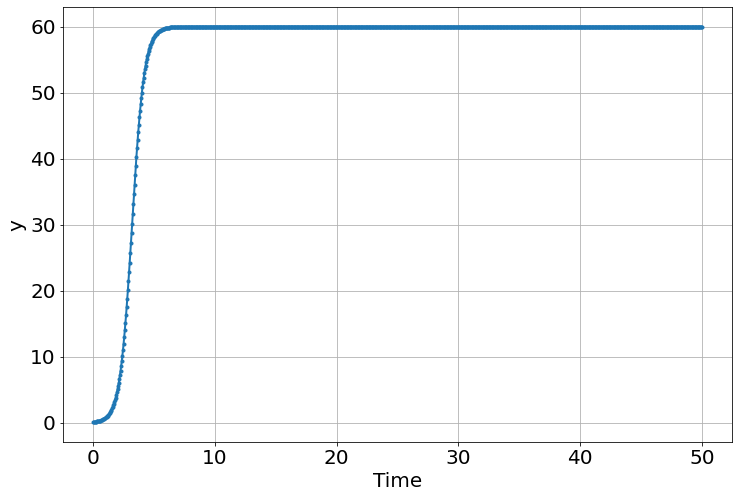

<Figure size 864x576 with 0 Axes>

In [16]:
sim=Simulation()
sim.add("y'=a*y*(1-y/K)",.1,plot=True)
sim.params(a=2,K=60)
sim.run(0,50)

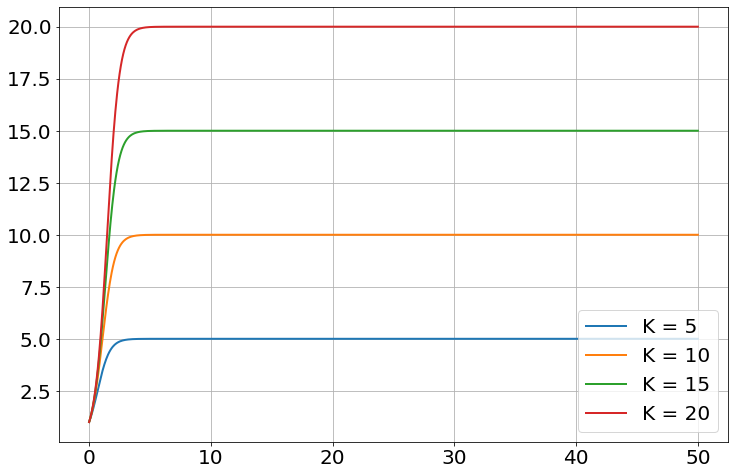

In [15]:
for K in [5,10,15,20]:
    sim=Simulation()
    sim.add("y'=a*y*(1-y/K)",1,plot=False)
    sim.params(a=2,K=K)
    sim.run(0,50)
    
    plot(sim.t,sim.y,'-',label=f'K = {K}')
    
legend()

In [8]:
from pyndamics3 import explore_parameters

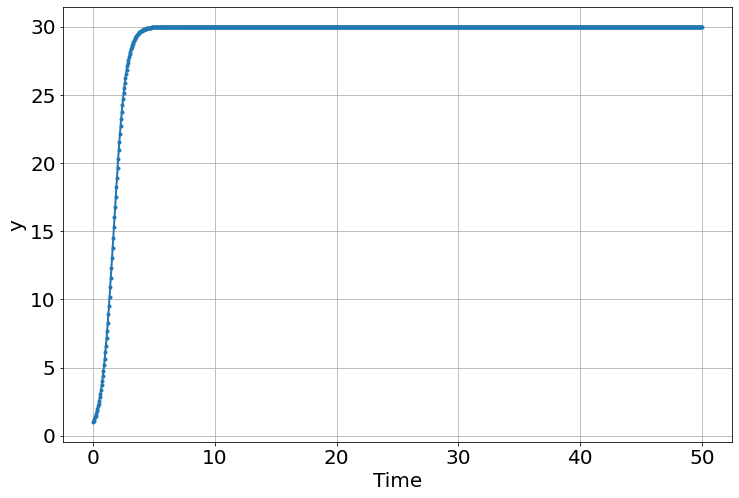

<Figure size 864x576 with 0 Axes>

In [10]:
sim=Simulation()
sim.add("y'=a*y*(1-y/K)",1,plot=True)
sim.params(a=2,K=30)
sim.run(0,50)


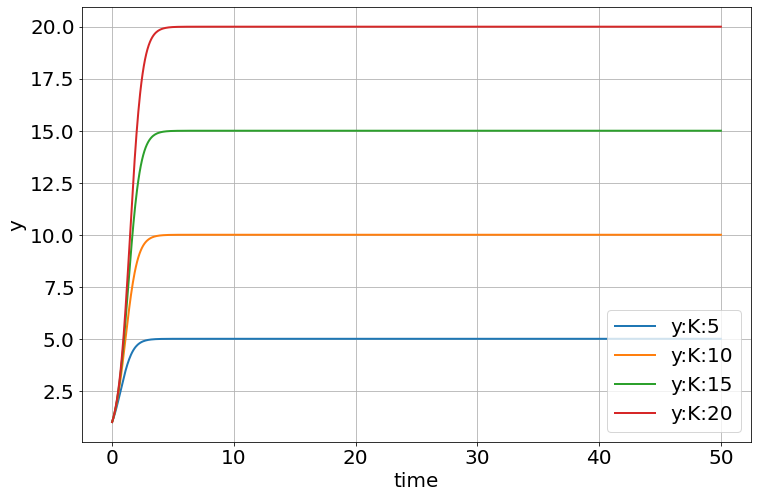

In [11]:
explore_parameters(sim,K=[5,10,15,20])

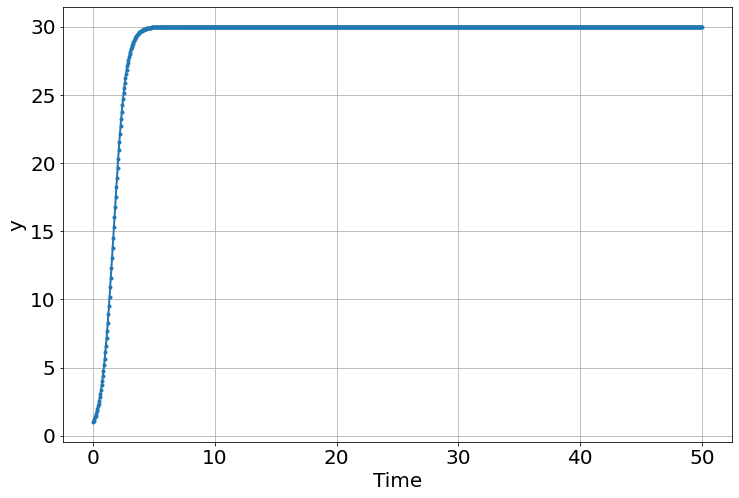

<Figure size 864x576 with 0 Axes>

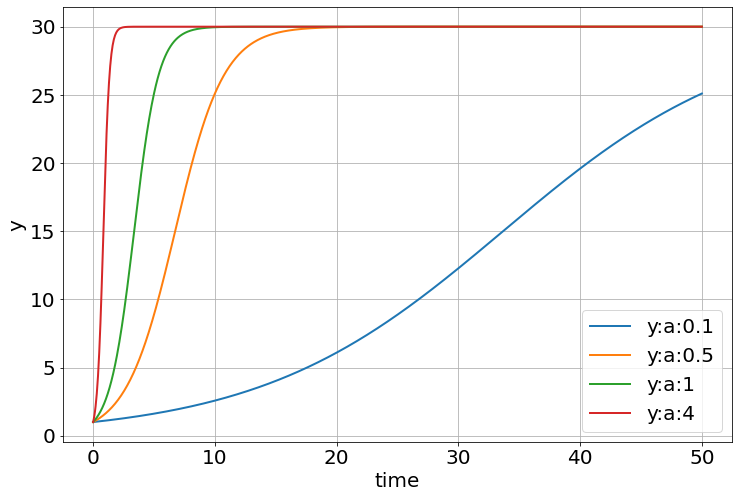

In [12]:
sim=Simulation()
sim.add("y'=a*y*(1-y/K)",1,plot=True)
sim.params(a=2,K=30)
sim.run(0,50)

explore_parameters(sim,a=[.1,.5,1,4])

## Harmonic Oscillator

$$
\frac{dx}{dt}= v 
$$

$$
\frac{dv}{dt}= -k\cdot x/m
$$

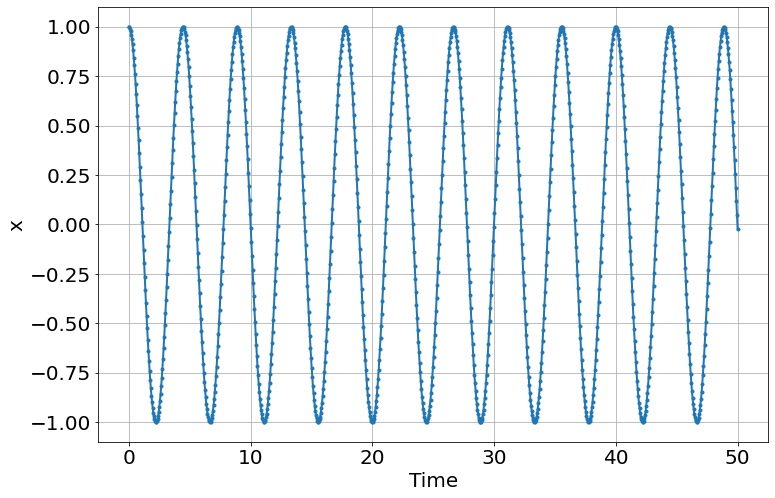

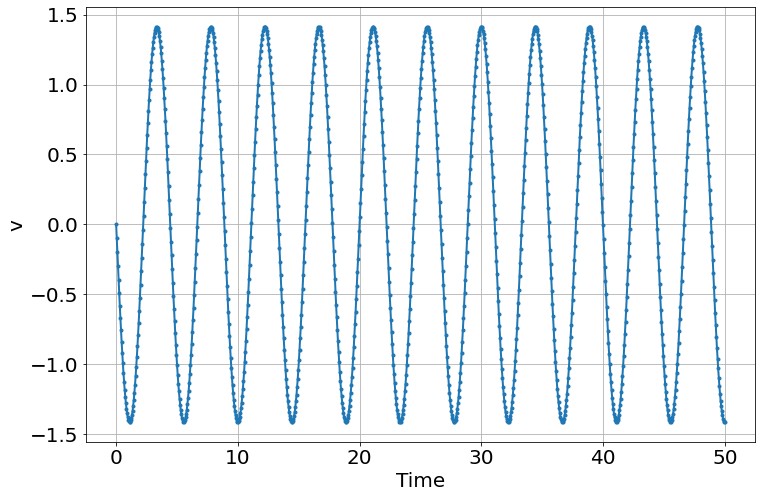

<Figure size 864x576 with 0 Axes>

In [13]:
sim=Simulation()
sim.add("x'=v",1,plot=True)
sim.add("v'=-k*x/m",0,plot=True)
sim.params(m=1,k=2)
sim.run(0,50)

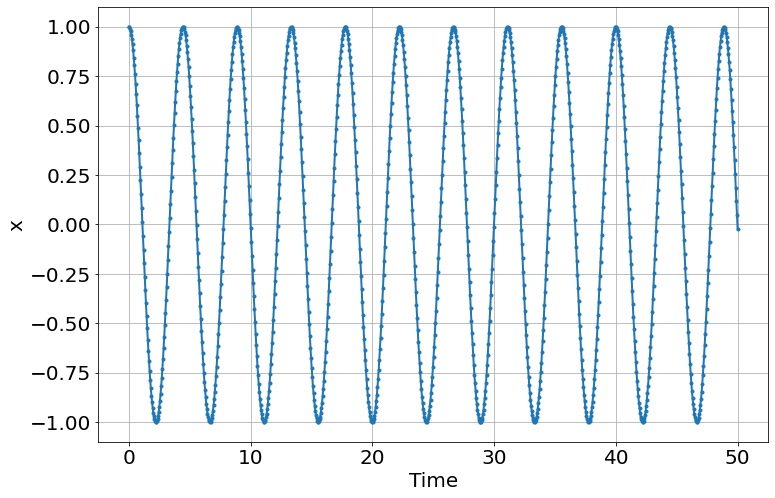

<Figure size 864x576 with 0 Axes>

In [14]:
sim=Simulation()
sim.add("x'=v",1,plot=True)
sim.add("v'=-k*x/m",0,plot=False)
sim.params(m=1,k=2)
sim.run(0,50)

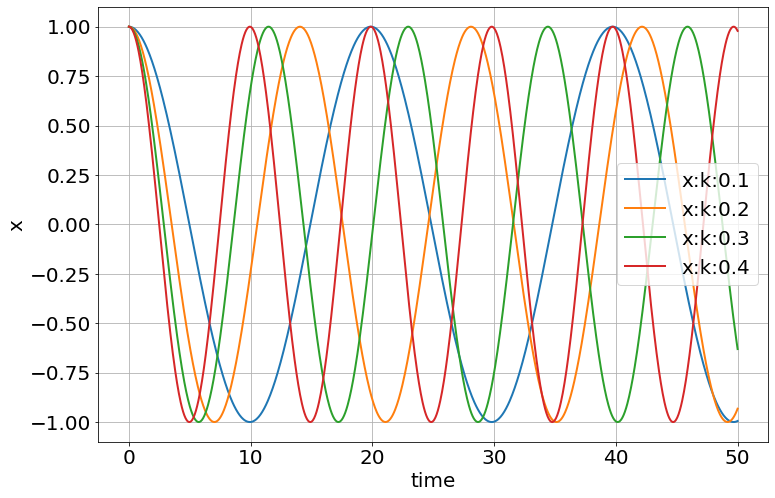

In [16]:
explore_parameters(sim,k=[.1,.2,.3,.4])

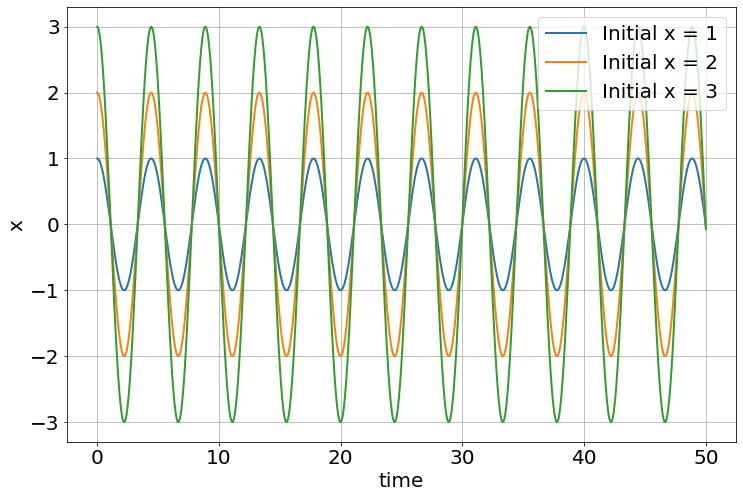

In [21]:
for ix in [1,2,3]:
    sim=Simulation()
    sim.add("x'=v",ix,plot=False)
    sim.add("v'=-k*x/m",0,plot=False)
    sim.params(m=1,k=2)
    sim.run(0,50)
    
    plot(sim.t,sim.x,label="Initial x = %g" % ix)
    
xlabel('time')
ylabel('x')
legend()

## Using Sample Data

In [23]:
data=pd.read_csv('data/logistic_sample_data/logistic_sample_data_0.csv')
data

,t,y
0,0.000000,-23.457109
1,2.631579,85.591985
2,5.263158,298.678725
3,7.894737,262.557105
4,10.526316,267.429098
5,13.157895,300.568103
6,15.789474,283.661187
7,18.421053,300.665351
8,21.052632,224.524302
9,23.684211,285.753790


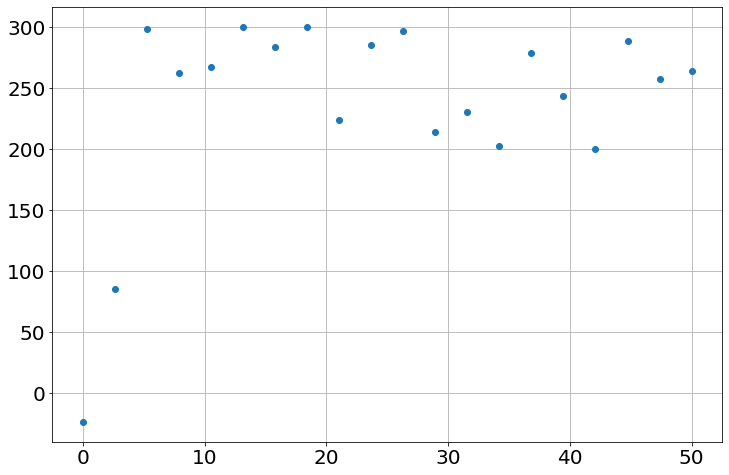

In [24]:
t=array(data['t'])
y=array(data['y'])
plot(t,y,'o')

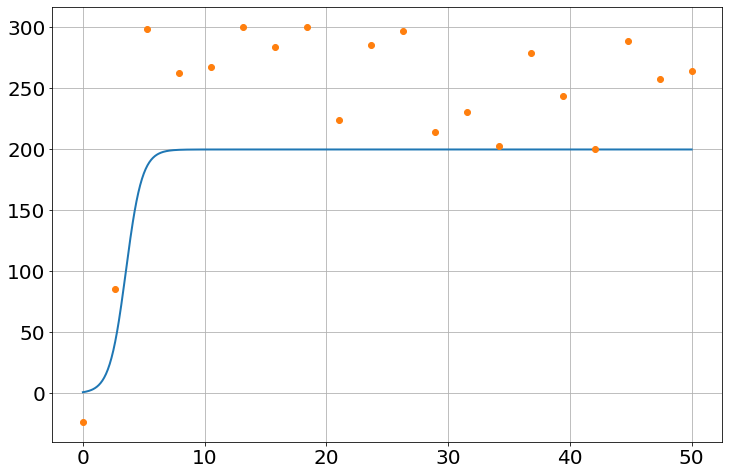

In [25]:
sim=Simulation()
sim.add("y'=a*y*(1-y/K)",1,plot=False)
sim.params(a=1.5,K=200)
sim.run(0,50)


plot(sim.t,sim.y,'-')
plot(t,y,'o')

## Make some sample data

In [23]:
def randbetween(low,high):
    return rand()*(high-low)+low

In [ ]:
for i in range(10):
    
    a=randbetween(0.03,3)
    K=randbetween(10,500)
    initial_y=randbetween(0.1,10)

    sim=Simulation()
    sim.add("y'=a*y*(1-y/K)",initial_y,plot=False)
    sim.params(a=a,K=K)
    sim.run(0,50)


    tt=linspace(0,50,20)
    result=sim.interpolate(tt)
    yy=result['y']

    yy=yy+randn(len(yy))*0.1*K
    plot(sim.t,sim.y,'-')
    plot(tt,yy,'o')

    data=pd.DataFrame({'t':tt,'y':yy})
    data.to_csv('data/logistic_sample_data/logistic_sample_data_%d.csv' % i,index=False)

    with open('data/logistic_sample_data/parameter_answers_logistic_sample_data_%d.md' % i,'w') as fid:
        fid.write("a=%g\n" % a)
        fid.write("K=%g\n" % K)
        fid.write("initial y=%g\n" % initial_y)        

{'y': array([  1.46911527,   5.48066522,  19.97021837,  67.15023494,
        180.42344408, 327.02554836, 417.08947977, 450.02873032,
        459.67510098, 462.30876073, 463.01370721, 463.20140388,
        463.25131096, 463.26457439, 463.26809974, 463.26903679,
        463.26928512, 463.26935199, 463.26936929, 463.26937369])}